# Calculate the specificity of kinase

In this module, we tried different method to evaluate the specificity of kinase

## Setup

In [ ]:
!pip install git+https://github.com/sky1ove/katlas.git -q

In [ ]:
from katlas.core import *
from katlas.plot import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Normalize raw data
> Divide values by the sum at each position

In [ ]:
df = Data.get_stack_raw().set_index('kinase')

In [ ]:
# Normalization
data= []
for kinase in df.index:
    k = get_one_kinase(df,kinase).T # It will drop S
    norm = k/k.sum()
    data.append(norm.unstack().values)

In [ ]:
# Get column name
col = norm.unstack().reset_index()
col['Position'] = col['position'].astype(str) + col['aa']

In [ ]:
# Get the stacked normalize data
norm = pd.DataFrame(data,columns=col['Position'].tolist(),index=df.index)

To save and load

In [ ]:
# norm.to_parquet('raw/normalized_raw_stack.parquet')

# norm = pd.read_parquet('raw/normalized_raw_stack.parquet')

In [ ]:
norm

,-5A,-5C,-5D,-5E,-5F,-5G,-5H,-5I,-5K,-5L,-5M,-5N,-5P,-5Q,-5R,-5S,-5T,-5V,-5W,-5Y,-5t,-5y,-4A,-4C,-4D,-4E,-4F,-4G,-4H,-4I,-4K,-4L,-4M,-4N,-4P,-4Q,-4R,-4S,-4T,-4V,-4W,-4Y,-4t,-4y,-3A,-3C,-3D,-3E,-3F,-3G,-3H,-3I,-3K,-3L,-3M,-3N,-3P,-3Q,-3R,-3S,-3T,-3V,-3W,-3Y,-3t,-3y,-2A,-2C,-2D,-2E,-2F,-2G,-2H,-2I,-2K,-2L,-2M,-2N,-2P,-2Q,-2R,-2S,-2T,-2V,-2W,-2Y,-2t,-2y,-1A,-1C,-1D,-1E,-1F,-1G,-1H,-1I,-1K,-1L,-1M,-1N,-1P,-1Q,-1R,-1S,-1T,-1V,-1W,-1Y,-1t,-1y,1A,1C,1D,1E,1F,1G,1H,1I,1K,1L,1M,1N,1P,1Q,1R,1S,1T,1V,1W,1Y,1t,1y,2A,2C,2D,2E,2F,2G,2H,2I,2K,2L,2M,2N,2P,2Q,2R,2S,2T,2V,2W,2Y,2t,2y,3A,3C,3D,3E,3F,3G,3H,3I,3K,3L,3M,3N,3P,3Q,3R,3S,3T,3V,3W,3Y,3t,3y,4A,4C,4D,4E,4F,4G,4H,4I,4K,4L,4M,4N,4P,4Q,4R,4S,4T,4V,4W,4Y,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAK1,0.022689,0.035505,0.012815,0.012230,0.033966,0.019584,0.026494,0.124227,0.020920,0.079374,0.069046,0.021992,0.057560,0.044781,0.076395,0.037377,0.062864,0.076023,0.025154,0.076070,0.016092,0.048843,0.056655,0.043720,0.026636,0.044880,0.041683,0.051507,0.041241,0.049834,0.064883,0.059496,0.055610,0.034429,0.042831,0.050275,0.057331,0.046525,0.053839,0.049617,0.032364,0.042855,0.026608,0.027184,0.086968,0.049592,0.021111,0.028780,0.037859,0.039790,0.030897,0.046573,0.040194,0.040992,0.060788,0.045241,0.084311,0.054048,0.045146,0.063711,0.064366,0.049818,0.033016,0.031971,0.023529,0.021298,0.042337,0.045041,0.063287,0.050041,0.026430,0.022223,0.044574,0.029722,0.046191,0.044778,0.091735,0.063561,0.017803,0.119329,0.043638,0.045919,0.067823,0.026759,0.022750,0.031369,0.016472,0.038221,0.034427,0.027287,0.014434,0.013064,0.048694,0.063137,0.061548,0.038860,0.109904,0.058475,0.049513,0.038775,0.101553,0.035516,0.082556,0.023518,0.028142,0.035029,0.039329,0.069464,0.010822,0.015957,0.027620,0.019240,0.009096,0.008699,0.011410,0.639600,0.014189,0.009037,0.017201,0.011591,0.010949,0.015090,0.041047,0.012233,0.022079,0.017568,0.057009,0.009493,0.014376,0.012665,0.010915,0.008891,0.048190,0.042834,0.035490,0.033654,0.031222,0.048152,0.039824,0.023788,0.037073,0.026591,0.030908,0.053588,0.033866,0.049569,0.049753,0.054441,0.207234,0.034872,0.036785,0.029499,0.026306,0.026361,0.038076,0.047253,0.026485,0.024303,0.028118,0.060385,0.044069,0.025364,0.048325,0.031965,0.028584,0.048096,0.044570,0.040756,0.058940,0.047972,0.205174,0.039907,0.031443,0.034840,0.021915,0.023461,0.050564,0.045986,0.030497,0.035830,0.040990,0.054958,0.043832,0.032531,0.065071,0.036098,0.036348,0.046335,0.049175,0.049749,0.072681,0.042606,0.087264,0.033087,0.064716,0.040807,0.019693,0.021180
ACVR2A,0.043352,0.051706,0.065975,0.058643,0.044600,0.035740,0.042359,0.046430,0.037911,0.044243,0.038720,0.039833,0.030841,0.031974,0.035314,0.043700,0.046971,0.044418,0.059664,0.042913,0.058193,0.056499,0.040047,0.056651,0.075079,0.062732,0.044669,0.039612,0.039796,0.037993,0.029302,0.037536,0.041615,0.036177,0.033611,0.034812,0.033001,0.055831,0.058023,0.039236,0.054435,0.042282,0.058369,0.049189,0.036483,0.056918,0.071392,0.081891,0.035060,0.044391,0.035993,0.034185,0.024104,0.032554,0.035005,0.034145,0.034143,0.034528,0.031311,0.056554,0.058515,0.037101,0.040155,0.037388,0.081910,0.066274,0.023194,0.076816,0.188090,0.228739,0.022060,0.021867,0.021314,0.019841,0.015501,0.018840,0.017432,0.029560,0.014038,0.033618,0.022062,0.055809,0.048157,0.021964,0.023605,0.021761,0.044212,0.031520,0.032302,0.099034,0.048343,0.050833,0.045945,0.022397,0.042042,0.031598,0.020905,0.050065,0.056573,0.032067,0.026552,0.035346,0.022678,0.052605,0.055424,0.043398,0.054508,0.052305,0.053921,0.071158,0.022460,0.062855,0.058437,0.111399,0.032336,0.019969,0.024298,0.040800,0.011351,0.030308,0.034562,0.022154,0.011813,0.042665,0.014444,0.041570,0.046707,0.045990,0.033370,0.033696,0.161368,0.097447,0.049572,0.064144,0.054705,0.045368,0.043464,0.060024,0.049605,0.040436,0.035568,0.029803,0.038851,0.038139,

## Max value in each kinase

In [ ]:
m = pd.DataFrame(norm.max(axis=1),columns=['max'])

In [ ]:
m.loc['CK1A']

max    0.79104
Name: CK1A, dtype: float64

In [ ]:
m.sort_values('max',ascending=False)

,max
kinase,
CK1G3,0.819808
CK1A,0.791040
YANK3,0.756693
GSK3B,0.744287
YANK2,0.739325
...,...
ANKRD3,0.102058
MLK2,0.097113
MASTL,0.093294


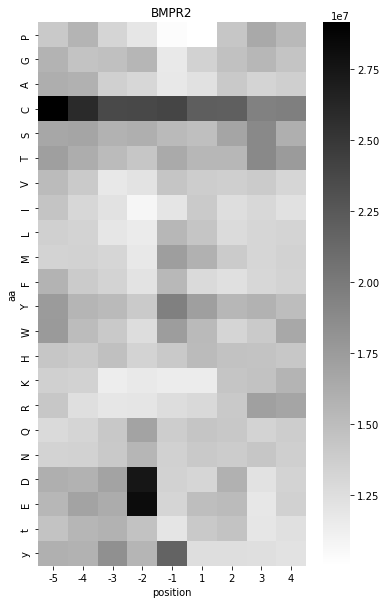

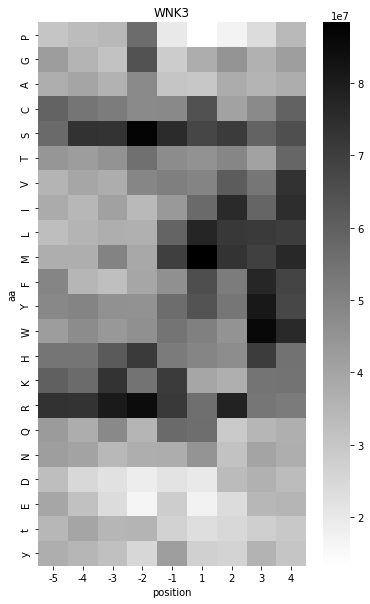

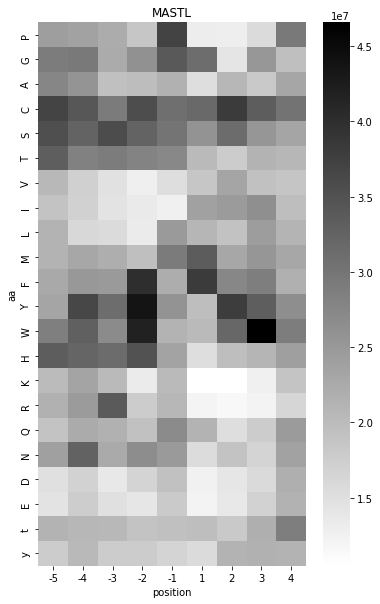

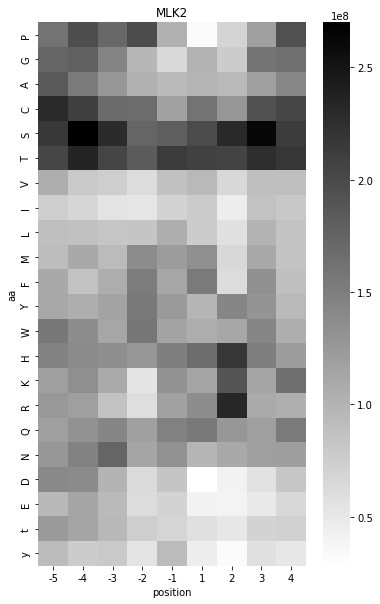

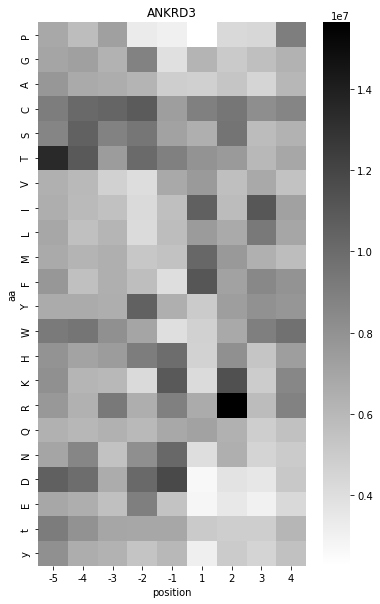

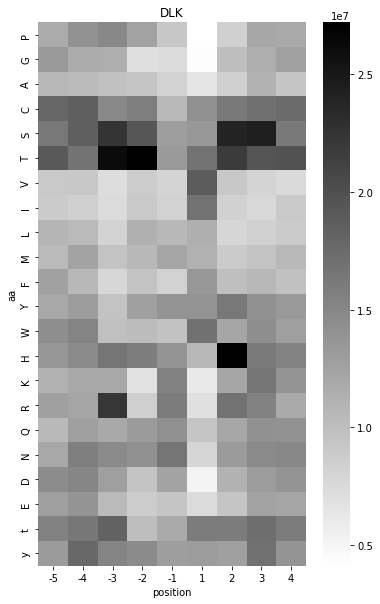

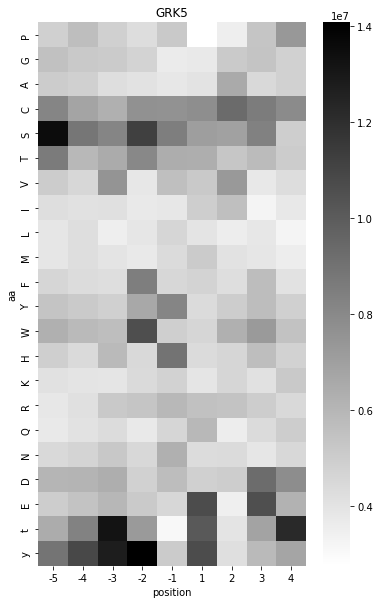

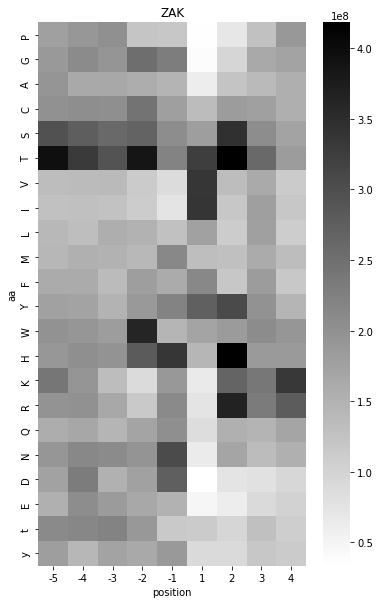

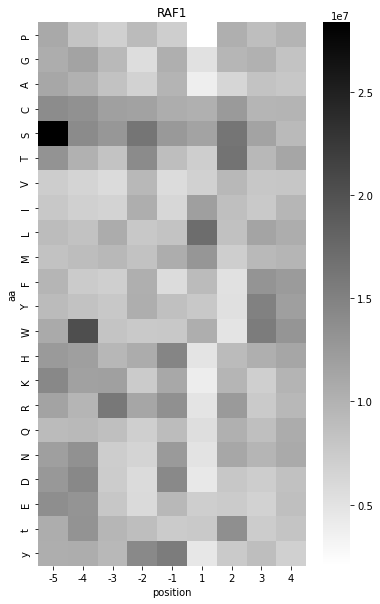

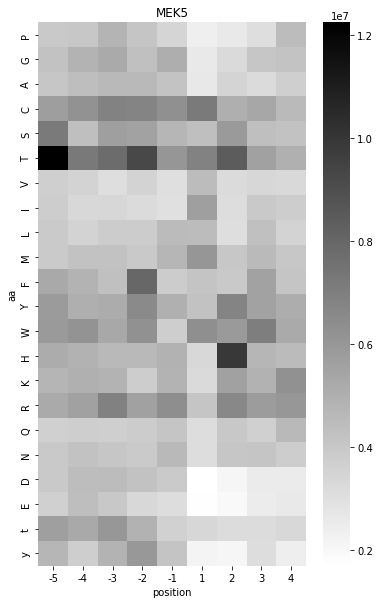

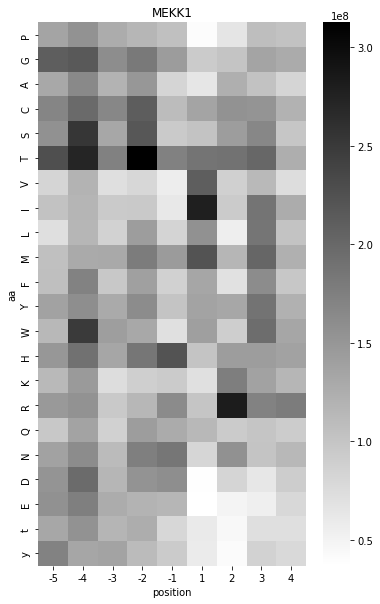

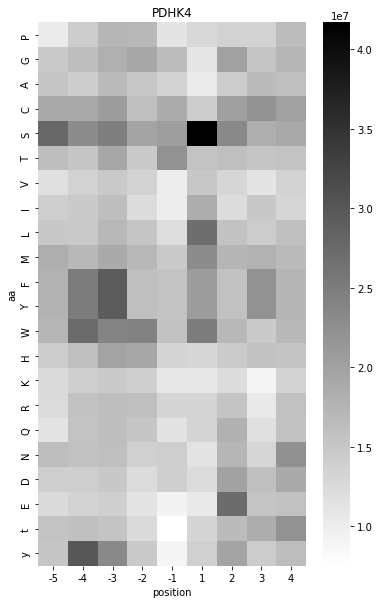

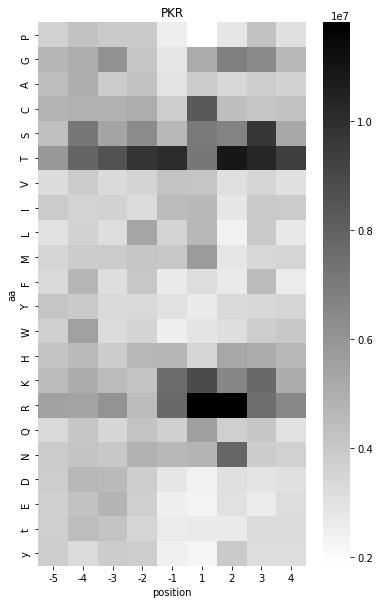

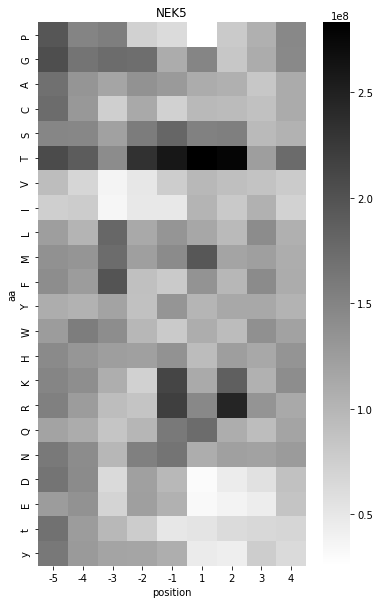

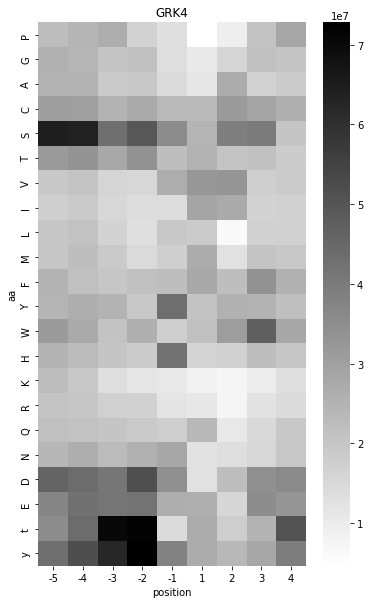

In [ ]:
for k in m.sort_values('max').index[:15]: #ascending=False
    get_heatmap(df, k)

In [ ]:
m.to_csv('raw/specificity_max.csv')

## Ratio of S & T

In [ ]:
data = []
for kinase in norm.index:
    k = get_one_kinase(norm,kinase)
    
    # calculate s and t ratio in terms of sum at each position
    S = (k['S']/k.sum(axis=1)).median()
    T = (k['T']/k.sum(axis=1)).median()
    
    # take an average of s and t
    ST = (S+T)/2
    
    data.append([kinase,S,T,ST])

In [ ]:
sp = pd.DataFrame(data,columns = ['kinase','S','T','ST']).set_index('kinase')

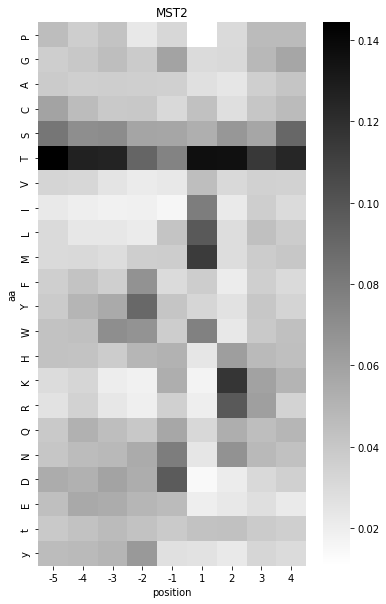

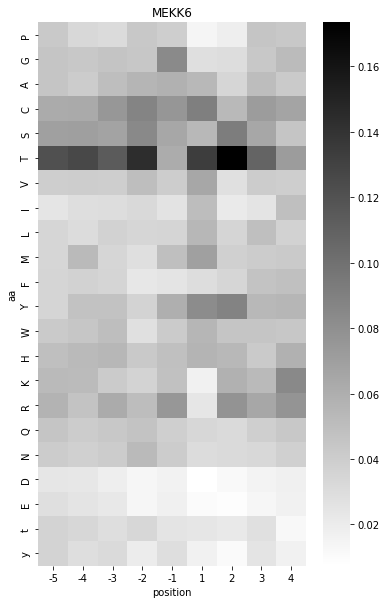

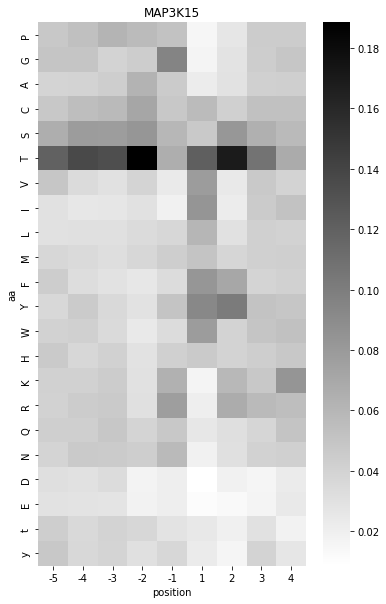

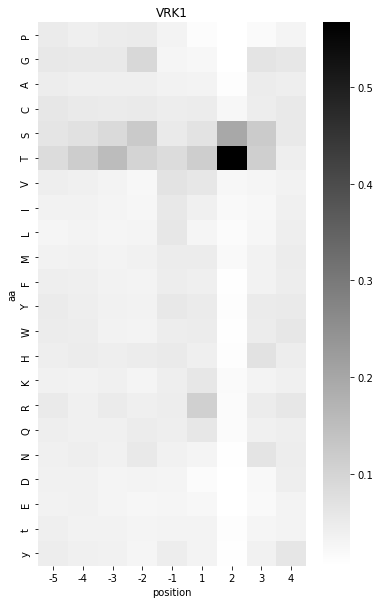

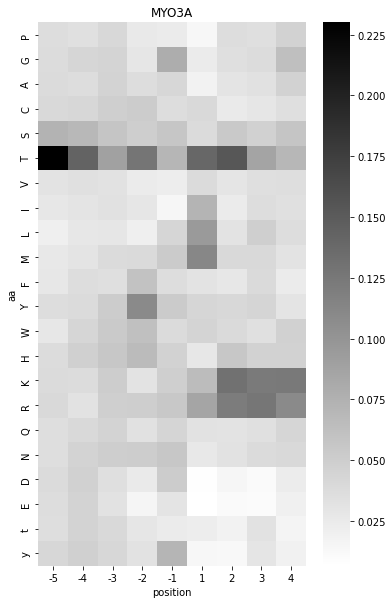

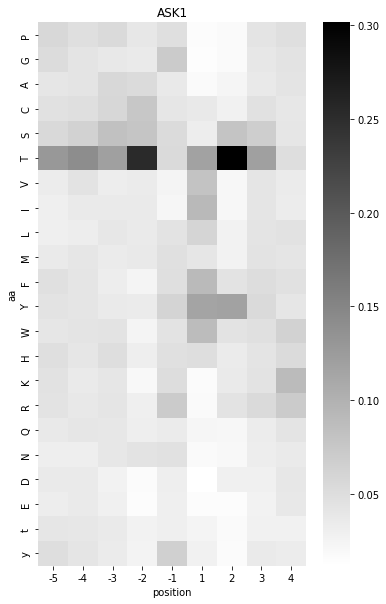

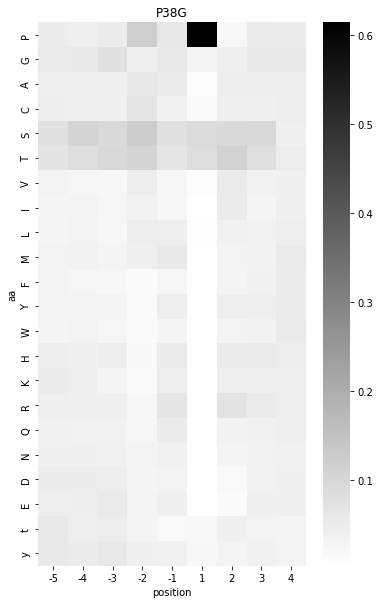

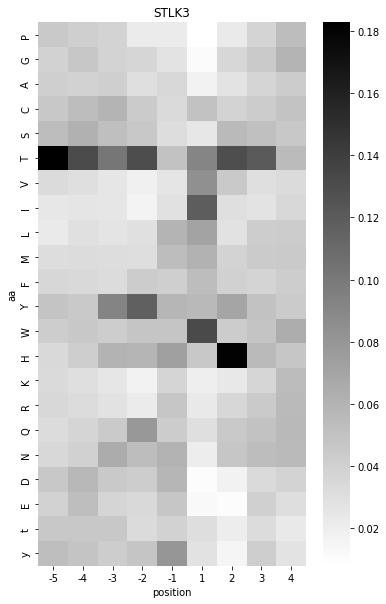

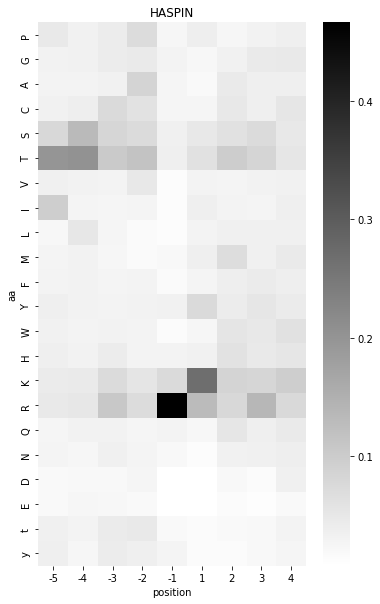

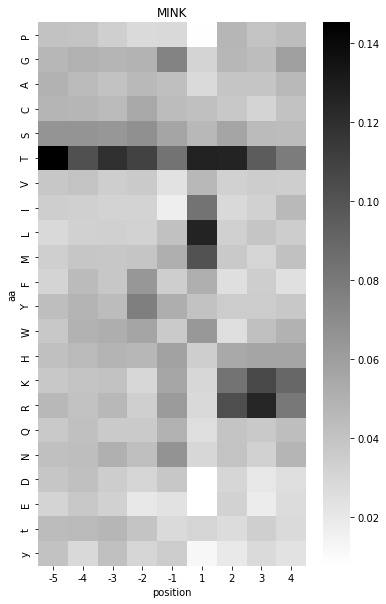

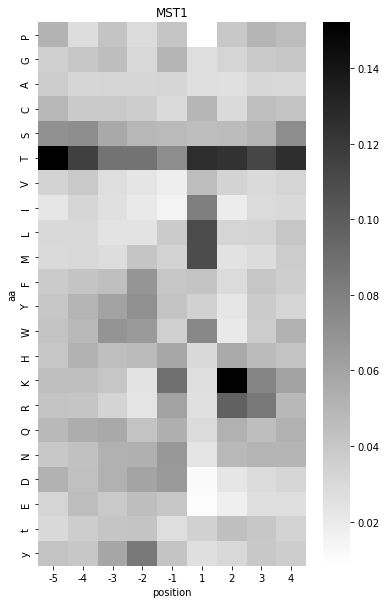

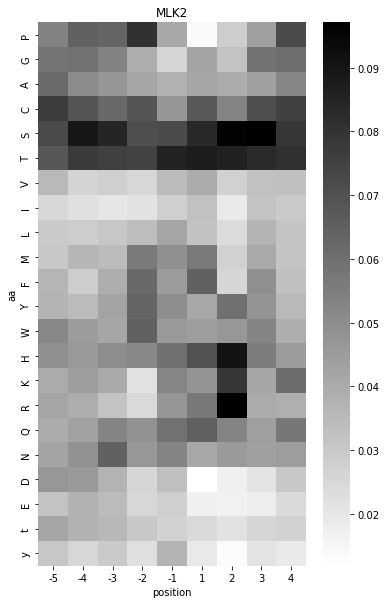

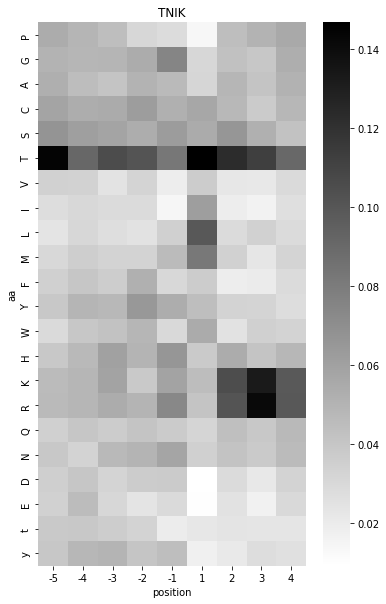

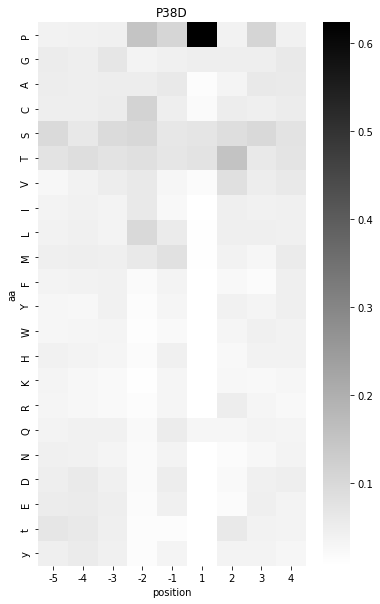

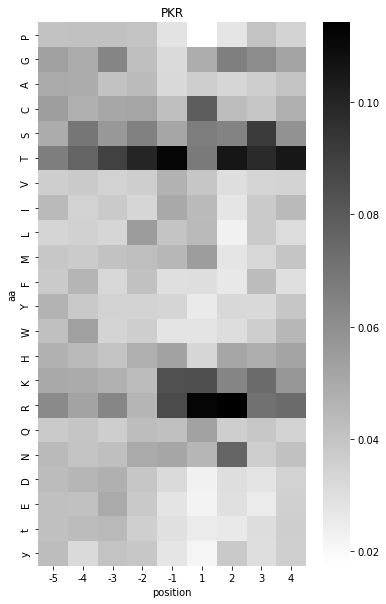

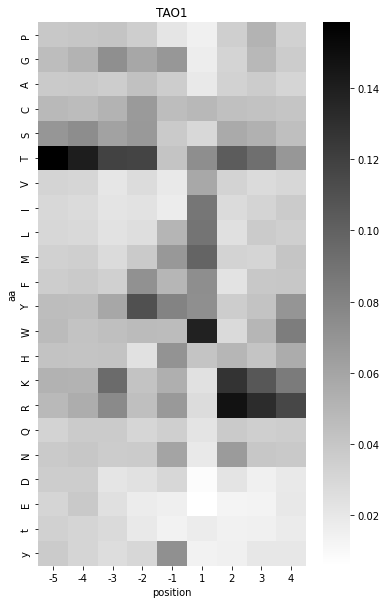

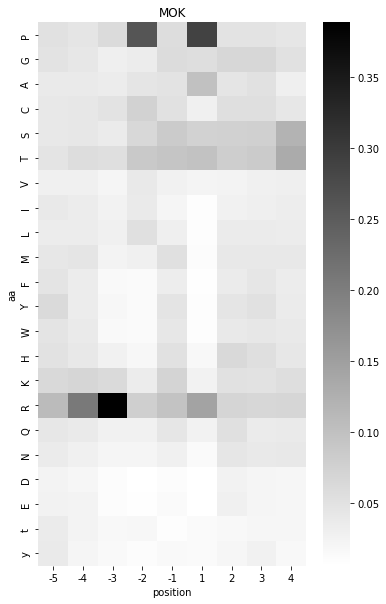

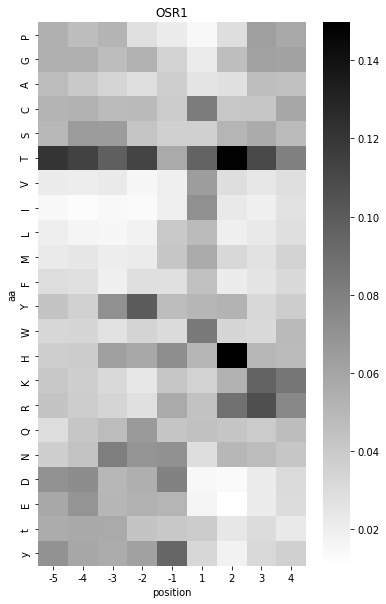

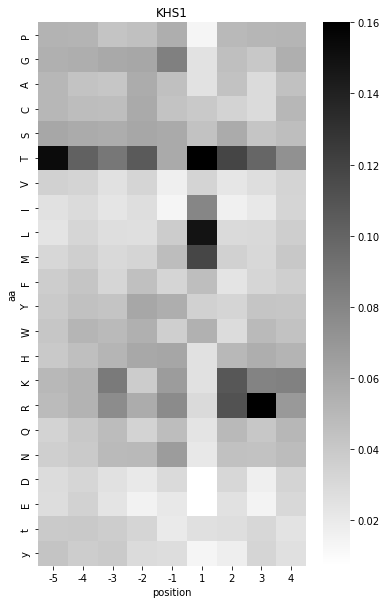

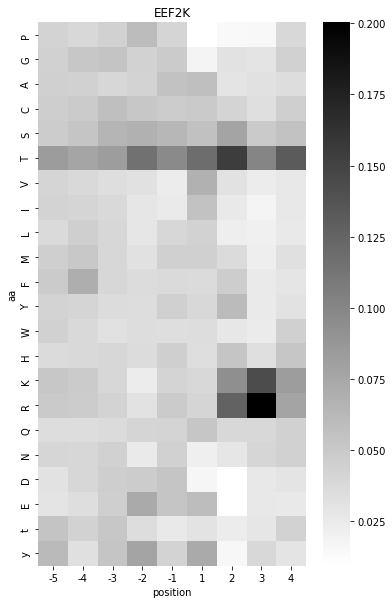

In [ ]:
for k in sp.sort_values('ST',ascending=False).index[:20]:
    get_heatmap(norm, k)

In [ ]:
sp

,s,t,st
kinase,,,
AAK1,0.045919,0.064366,0.055143
ACVR2A,0.052605,0.048987,0.050796
ACVR2B,0.049612,0.049033,0.049322
AKT1,0.059608,0.054201,0.056904
AKT2,0.053721,0.047268,0.050494
...,...,...,...
YANK2,0.042694,0.059218,0.050956
YANK3,0.054204,0.050131,0.052167
YSK1,0.049776,0.099536,0.074656


## Coefficient of Variation

In [ ]:
data = []
for i,r in norm.iterrows():
    variance = np.var(r)
    std_dev = np.std(r)
    mean_val = np.mean(r)
    cv = std_dev / mean_val
    
    data.append([i,variance,std_dev,mean_val,cv])

In [ ]:
v = pd.DataFrame(data,columns=['kinase','var','std','mean','cv']).set_index('kinase')

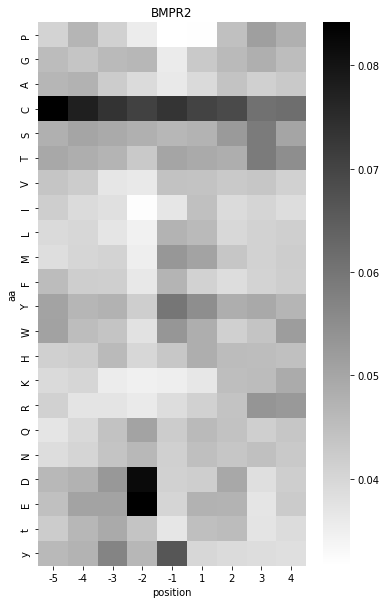

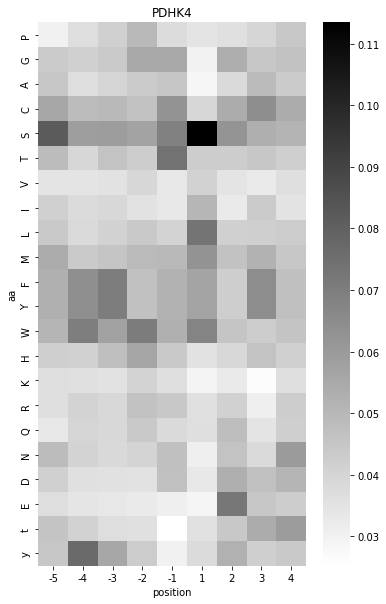

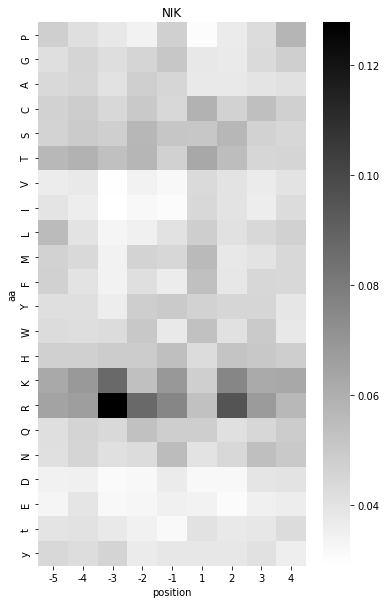

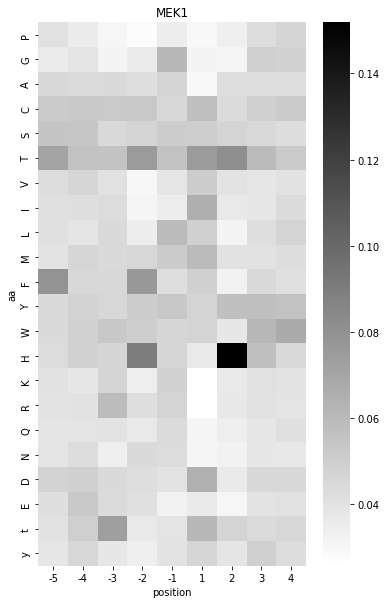

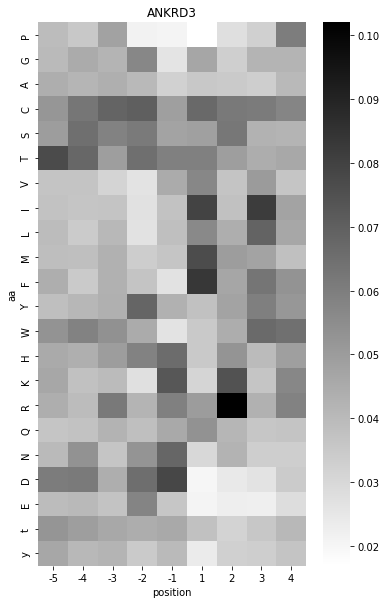

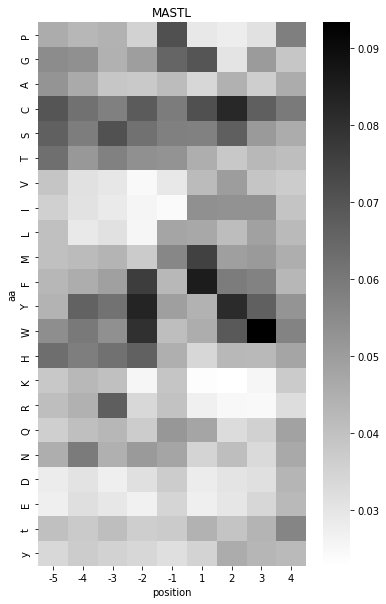

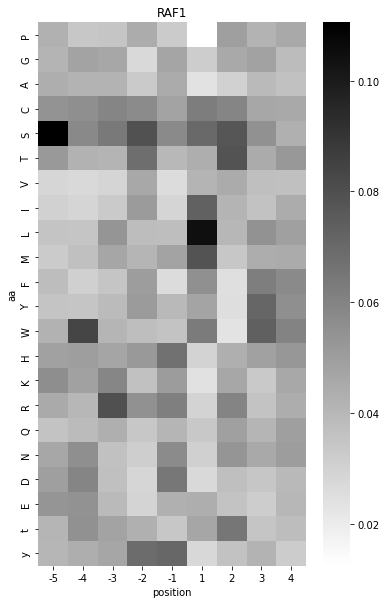

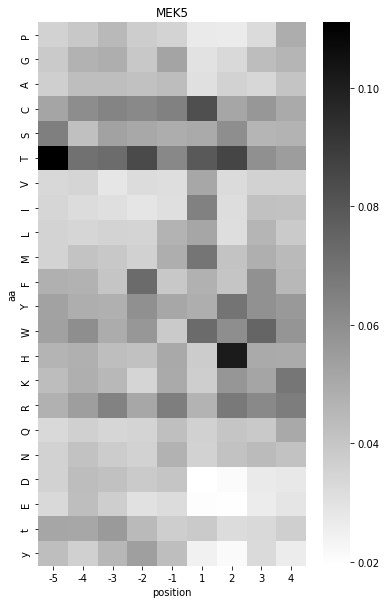

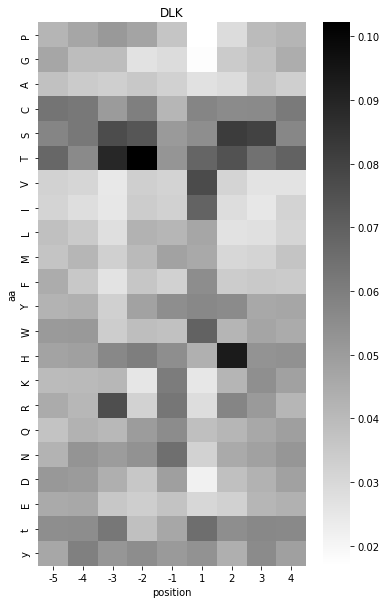

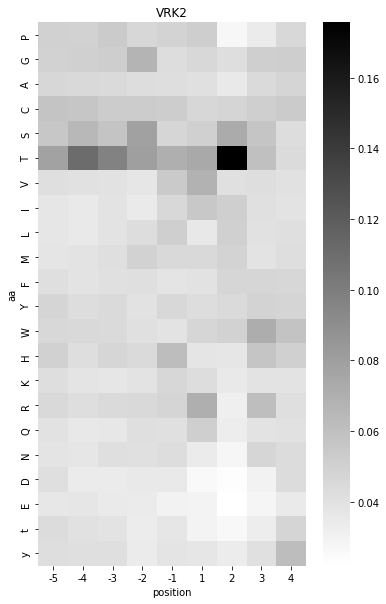

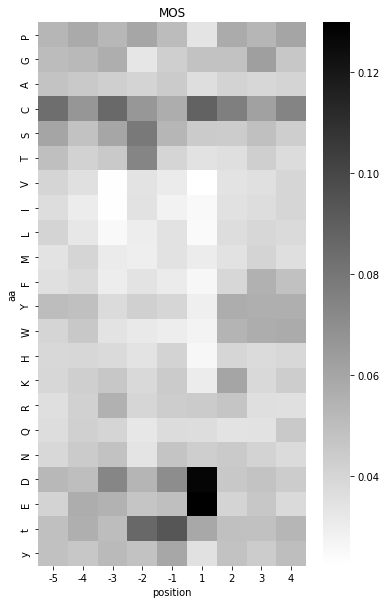

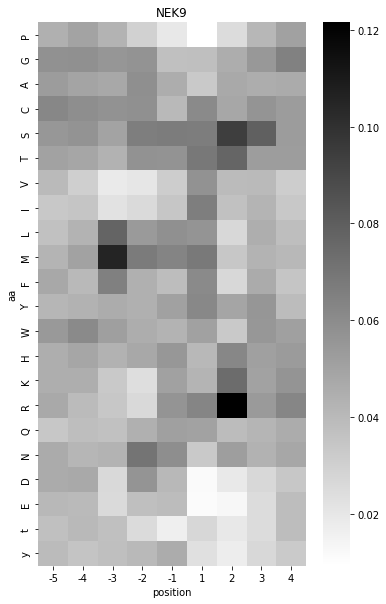

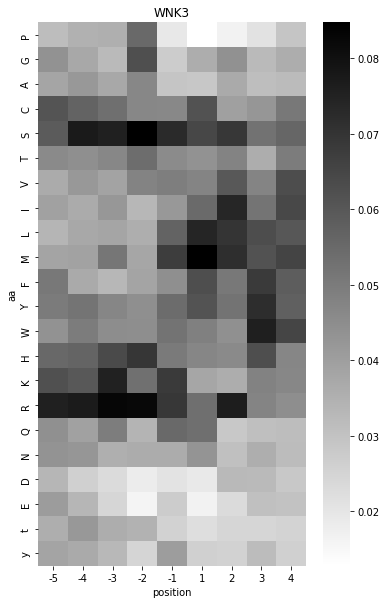

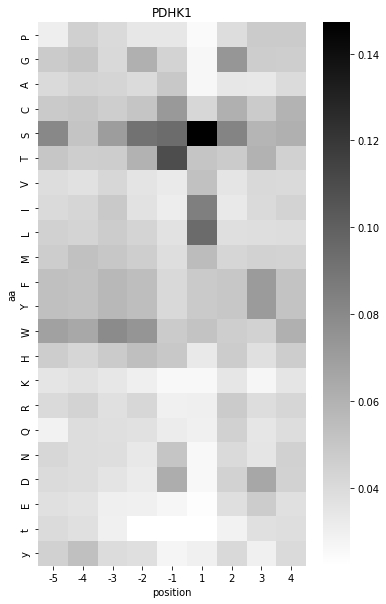

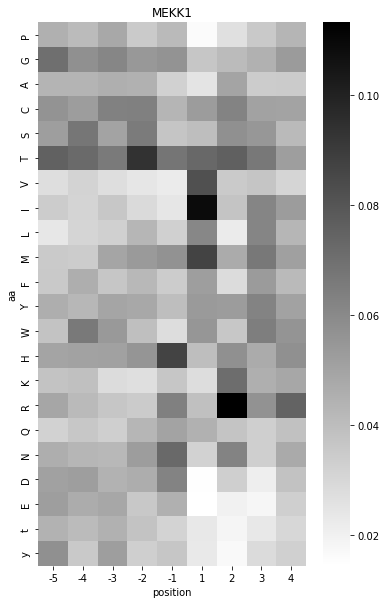

In [ ]:
for k in v.sort_values('cv').index[:15]:
    get_heatmap(norm, k)

## Calculate average below 0.85 quantile for each kinase

In [ ]:
q = norm.quantile(0.7,axis=1)

factor = norm.apply(lambda r: r[r < q[r.name]].mean(),axis=1)

f = pd.DataFrame(factor,columns=['factor'])

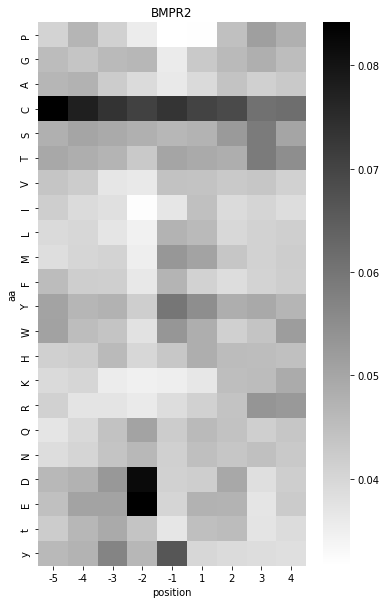

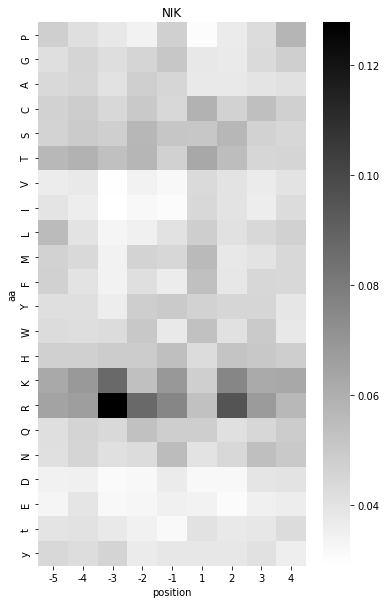

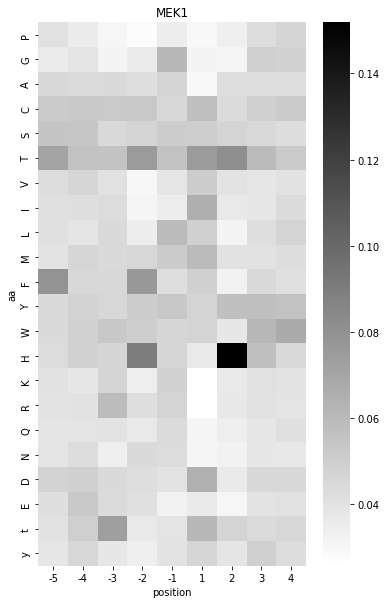

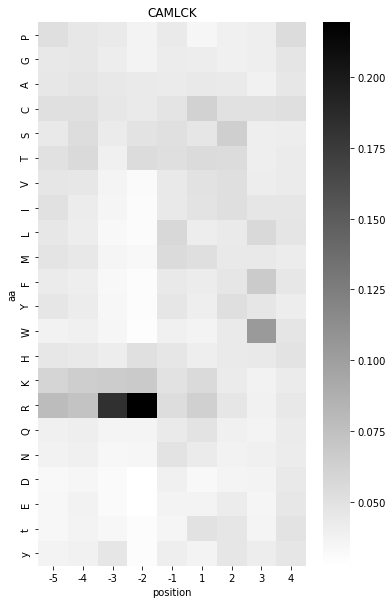

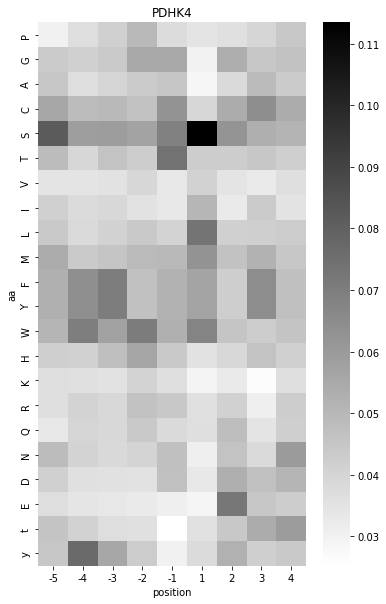

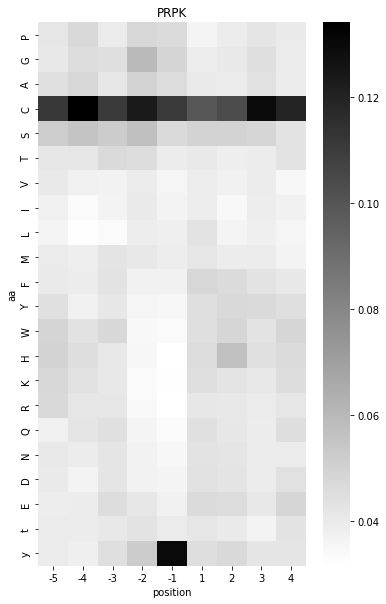

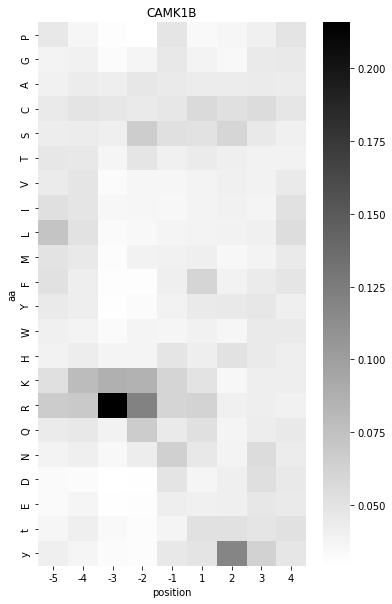

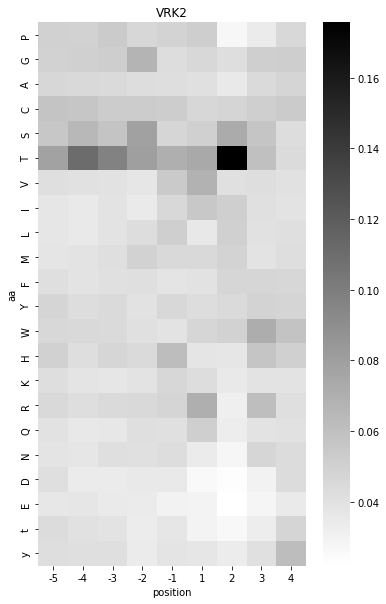

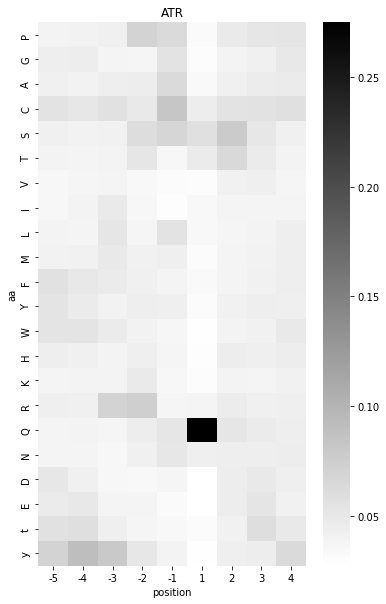

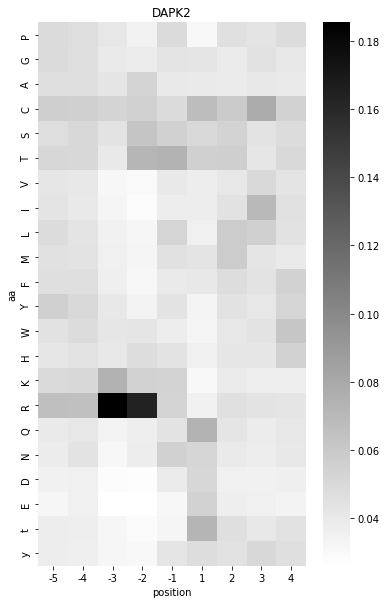

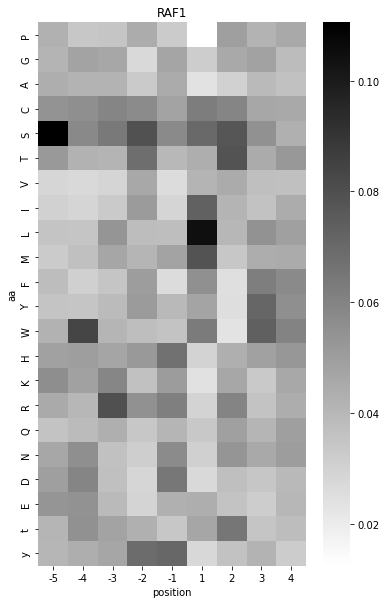

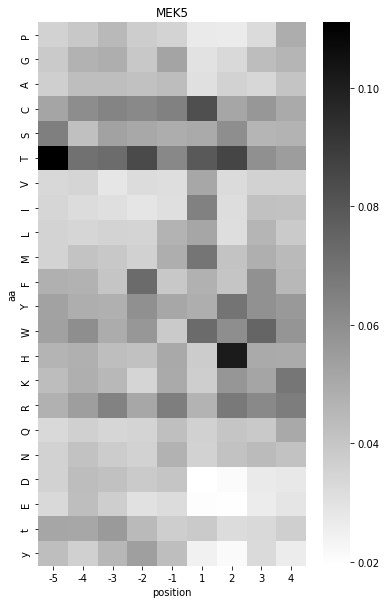

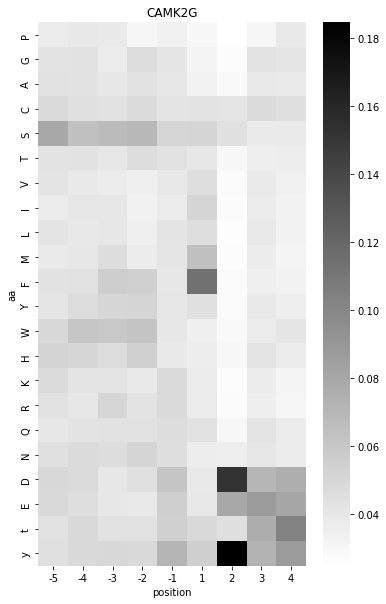

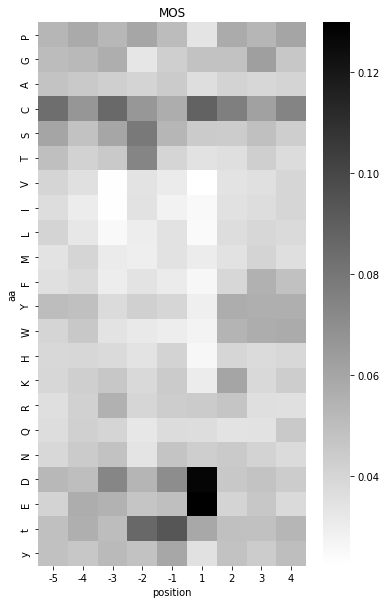

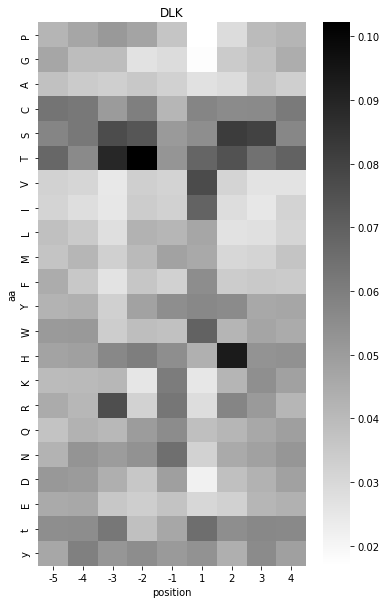

In [ ]:
for k in f.sort_values('factor',ascending=False).index[:15]:
    get_heatmap(norm, k)